In [1]:
import numpy as np
import argparse
import csv
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
def readData(filename):
    X = []
    y = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            X.append(float(row[0]))
            y.append(float(row[1]))
    return X,y
X,y = readData('gaussian.csv')

In [4]:
Xsub = X[:40]
ysub = y[:40]

In [5]:
# highest power is m here
def makeDesignMat(X,m):
    return np.vander(X,m+1,increasing=True)

In [6]:
Xdes = makeDesignMat(Xsub,12)

In [7]:
# θ = (X'X)−1 . X' . y
theta = np.dot(np.linalg.inv(np.dot(Xdes.transpose(),Xdes)),np.dot(Xdes.transpose(),ysub))

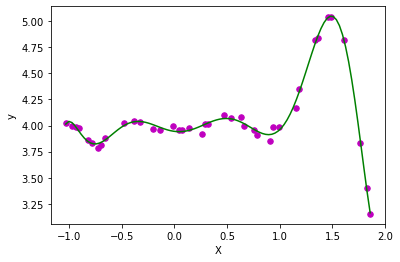

In [8]:
def plot_reg(x,y,theta):
    def aux(X_line,theta):
        temp = 0
        for i in range(len(theta)):
            temp += np.power(X_line,i) * theta[i]
        return temp
    plt.scatter(x,y,color='m',marker ='o',s=30)
    x_line = np.linspace(min(Xsub),max(Xsub),100)
    y_pred = aux(x_line,theta)
    plt.plot(x_line,y_pred, color='g')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()
plot_reg(Xsub,ysub,theta)

In [9]:
LEARNING_RATE = 1e-3
BATCH_SIZE = 4
NUM_ITER = 2000

In [10]:
def chunkarr(arr,n):
    return [arr[i:i + n] for i in range(0, len(arr), n)]

In [11]:
def getError(Xdes,y,theta):
    error = 0
    error = np.sum(np.square(np.matmul(Xdes,theta) - y))
#     for i in range(len(Xdes)):
#         error += pow(np.dot(Xdes[i],theta) - y[i],2)
    return error/2

In [22]:
def sgd(X,y,m):
    theta = np.random.rand(m+1)
    Xdes = makeDesignMat(X,m)
#     for num in tqdm(range(NUM_ITER)):
#         for i in range(len(Xdes)):
#             for j in range(len(theta)):
#                 theta[j] += LEARNING_RATE * (y[i] - np.dot(theta,Xdes[i]))*Xdes[i][j]
    for num in tqdm(range(NUM_ITER)):
        #theta = theta - LEARNING_RATE * (np.transpose(Xdes) * (Xdes * theta - y))
        for i in range(len(Xdes)):
            temp = 0
    return theta   
theta = sgd(Xsub,ysub,6)  

(7, 1)


ValueError: operands could not be broadcast together with shapes (40,7) (7,1) 

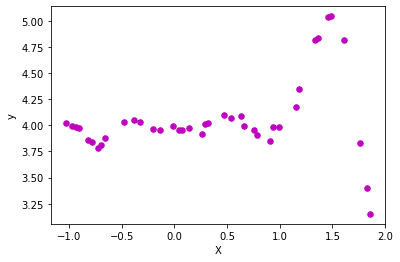

In [17]:
plot_reg(Xsub,ysub,theta)

In [177]:
def bgd(X,y,m):
    theta = np.random.rand(m+1)
    Xdes = makeDesignMat(X,m)
    for num in tqdm(range(NUM_ITER)):
        for j in range(len(theta)):
            temp = 0
            for i in range(len(Xdes)):
                temp += (y[i] - np.dot(theta,Xdes[i]))*Xdes[i][j]
            theta[j] += LEARNING_RATE * temp
    return theta
theta = bgd(X,y,6)  

In [232]:
def gradDescent(X,y,m):
    #theta = np.random.rand(m+1)
    theta = np.array([0.0]*(m+1))
    Xdes = makeDesignMat(X,m)
    Xchunks = chunkarr(Xdes,BATCH_SIZE)
    ychunks = chunkarr(y,BATCH_SIZE)
    J = []
    for num in tqdm(range(NUM_ITER)):
        for chunk in range(len(Xchunks)):
            Xcon = Xchunks[chunk]
            ycon = ychunks[chunk]
            for j in range(len(theta)):
                temp = 0
                for i,xi in enumerate(Xcon):
                    temp += (ycon[i] - np.dot(theta,Xcon[i]))*Xcon[i][j]
                theta[j] += LEARNING_RATE * temp
            j = getError(Xdes,y,theta)
            J.append(j)
    return theta,J
theta,J = gradDescent(Xsub,ysub,5)  

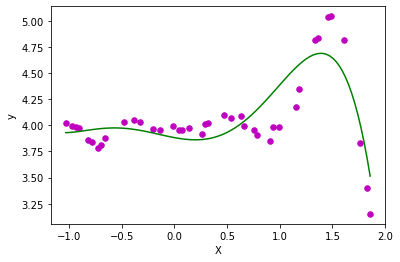

In [231]:
plot_reg(Xsub,ysub,theta)

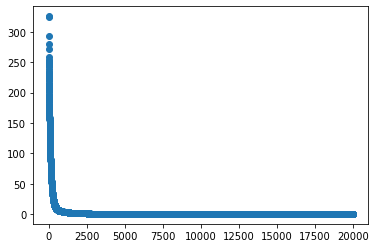

In [235]:
plt.figure()
plt.scatter(x = list(range(0,20000)), y=J)
plt.show()